This code is to some extent a rewriting of some of the methods in the code provided by Sybil Derrible for CME594 Introduction to Data Science (http://derrible.people.uic.edu/course_documents/syllabi/2017_Winter_CME594_Introduction_to_Data_Science.pdf ). for homework 2 on scaling laws and regression. To begin the practice with these techniques, we will import the libraries we want to use. 

In [35]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import math

Next, we will import the first data set that we want to use. This is a toy data set with variables for income, race, education, housing, and commute. Once the data is imported, we build a data frame with it. 

In [49]:
file_name = 'usa_00006'
input_data = pd.read_csv(file_name + '.csv', header=0)
input_data.shape
list(input_data)

['INC', 'RACE_bin', 'EDUC', 'TRANTIME', 'ROOMS']

Here are the specifics of the data:
educ- A variable which represents education level. The levels aren't years, but I'm not currently sure how they are grouped. 
race- This is a binary varible (1 for caucasion, 0 else)
rooms- This variable represents housing style by number of rooms
tran- This is the average number of minutes commuting in the previous week. It appears to have some serious issues. 
inc- total reported household income. 

Now, let's split the data so we can (attempt to) predict income from the other variables. One split will be separating the target data from the predictors. The next will be separating the data into train and test splits. 


In [37]:
Y=input_data['INC']
X=input_data.drop('INC', axis=1)

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.2, random_state=7)
X_train.shape

(336569, 4)

Now, we can actually fit our linear regression. 

In [45]:
lm=linear_model.LinearRegression()
lm.fit(X_train,Y_train)
lm.coef_

array([  3.64978087,   9.84813175,   0.09731314,  10.45237039])

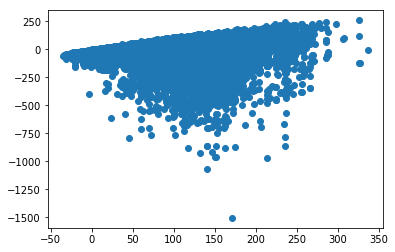

In [39]:
plt.scatter(lm.predict(X_test), lm.predict(X_test)-Y_test)
plt.show()

We can see from the residual plot above that this does not look like a good model. There is clearly an increasing trend to the residual rather than a random scatter, which is what we hope to see. With this in mind, let's try adding all degree 2 combinations of the variables.  

In [40]:
poly = PolynomialFeatures(degree=2)
X_new=poly.fit_transform(X)

In [41]:
X_new_train,X_new_test,Y_new_train,Y_new_test=train_test_split(X_new,Y,test_size=.2, random_state=7)
X_new_train.shape


(336569, 15)

In [47]:
lm.fit(X_new_train,Y_new_train)
lm.coef_


array([  0.00000000e+00,  -1.87799323e+00,  -1.34386722e+01,
         1.04219362e-01,   5.36849625e+00,  -1.87799323e+00,
        -5.91313978e-01,   3.89147534e-02,   1.90237175e+00,
         1.10028619e+00,   2.29676718e-02,   1.12200473e+00,
        -1.24184813e-03,  -1.39356959e-02,  -3.24772239e-01])

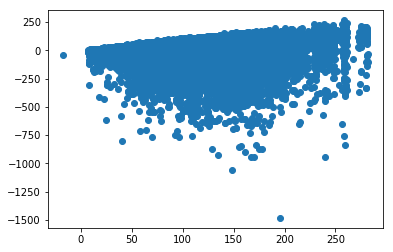

In [48]:
plt.scatter(lm.predict(X_new_test), lm.predict(X_new_test)-Y_new_test)
plt.show()

We can see here that errors still have the same general (undesirable) shape, so this probably hasn't improved our model. 